## New file to resolve the issue stemming from the training DF size and the prediction DF size.
1. Training DF = 7241 columns
2. Prediction DF = 2216 columns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reference: 01-Keras-Regression (section7: ANN)

In [4]:
directory = 'C:/Users/te521690/OneDrive - TE Connectivity/Desktop/Canada Backlog/46. Jun 15, 2023/'

### Import Training file

In [5]:
df = pd.read_excel(directory + 'MFG 2 yr sales.xlsx', engine='openpyxl')

In [6]:
print(df.dtypes)

SITE                           int64
Invoice#                      object
InvoiceDt             datetime64[ns]
Invoice-Year#Month            object
SO#                           object
                           ...      
Ship-B4                       object
EDI Order                     object
SO-Userid                     object
Part Type                     object
StdLT                        float64
Length: 110, dtype: object


In [7]:
# # Replace '?' with a default value
# df['Desc1'].replace('+', '&', inplace=True)
# df['Desc2'].replace('+', '&', inplace=True)

In [8]:
#df.info()

In [9]:
df.head()

,SITE,Invoice#,InvoiceDt,Invoice-Year#Month,SO#,InvLine,Ord-Dt,CustPO,Buyer as of 1.4.17,Group,...,Hot Order,Hot Type,Due Date Changed Count,Original Due Date,Customer Class,Ship-B4,EDI Order,SO-Userid,Part Type,StdLT
0,2230,RJ723838,2021-06-14,21#06,RV101441,1,2021-04-29,12263,FVPP4,NaN,...,nothot,nothot,2,2021-05-11 00:00:00,2378,yes,no,cron,MTS,3.0
1,2230,RJ723839,2021-06-14,21#06,16381680,1,2021-05-07,2716381680,FVPP4,MVCC,...,nothot,nothot,1,2021-05-28 00:00:00,1151,yes,no,cron,ATO,36.0
2,2230,RJ723840,2021-06-14,21#06,RV104788,1,2021-06-09,7442122,FVMP1,MTO1,...,nothot,nothot,0,2021-06-14 00:00:00,OMNI,yes,no,us055525,MTSQS,3.0
3,2230,RJ723841,2021-06-14,21#06,RV104767,3,2021-06-09,178266-2,FVMP1,MTO1,...,nothot,nothot,0,2021-06-14 00:00:00,OMNI,yes,no,te414937,MTSQS,3.0
4,2244,RJ723842,2021-06-14,21#06,RV104609,1,2021-06-08,2716735604,JZFGP7,AMPSMINI,...,nothot,nothot,1,2021-06-14 00:00:00,1914,yes,no,te322973,MTS,108.0


In [10]:
df1 = df.iloc[:,[4,5,22,24,89,108,30,6,26,28,2]]

In [11]:
df1.head()

,SO#,InvLine,Part,Desc1,OTTO-GPL,Part Type,QtyInvoiced,Ord-Dt,ReqDt,DueDt,InvoiceDt
0,RV101441,1,360954-000,AMPS-69338-1,364,MTS,11000.0,2021-04-29,2021-05-18 00:00:00,2021-06-01 00:00:00,2021-06-14
1,16381680,1,CZ1481-000,MVCC-25/1.0(S7),760,ATO,49.0,2021-05-07,2021-05-14 00:00:00,2021-06-11 00:00:00,2021-06-14
2,RV104788,1,EE0446-000,WCSM-24/6-225-S-(B50),755,MTSQS,100.0,2021-06-09,2021-06-11 00:00:00,2021-06-14 00:00:00,2021-06-14
3,RV104767,3,237497-000,CRSM-53/13-1200,755,MTSQS,5.0,2021-06-09,2021-06-14 00:00:00,2021-06-14 00:00:00,2021-06-14
4,RV104609,1,687866-000,AMPS-0-0083623-7,141,MTS,21600.0,2021-06-08,2021-07-26 00:00:00,2021-06-15 00:00:00,2021-06-14


In [12]:
df1['SO#'] = df1['SO#'].astype(str)

C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df1['Part'] = df1['Part'].astype(str)

C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df1['Desc1'] = df1['Desc1'].astype(str)

C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
# df1['OTTO-GPL'] = df1['OTTO-GPL'].astype(str)

In [16]:
# Replace '?' with a default value
df1['ReqDt'].replace('?', '1970-01-01', inplace=True)

# Convert to datetime64
df1['ReqDt'] = pd.to_datetime(df1['ReqDt'], errors='coerce')


C:\Users\te521690\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
# Replace '?' with a default value
df1['DueDt'].replace('?', '1970-01-01', inplace=True)

# Convert to datetime64
df1['DueDt'] = pd.to_datetime(df1['ReqDt'], errors='coerce')


C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
df1.columns

Index(['SO#', 'InvLine', 'Part', 'Desc1', 'OTTO-GPL', 'Part Type',
       'QtyInvoiced', 'Ord-Dt', 'ReqDt', 'DueDt', 'InvoiceDt'],
      dtype='object')

In [19]:
df1.drop(['SO#','InvLine','Desc1'], axis=1,inplace=True)

C:\Users\te521690\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
df1.dtypes

Part                   object
OTTO-GPL               object
Part Type              object
QtyInvoiced           float64
Ord-Dt         datetime64[ns]
ReqDt          datetime64[ns]
DueDt          datetime64[ns]
InvoiceDt      datetime64[ns]
dtype: object

In [21]:
#set(df1['OTTO-GPL'])

In [22]:
df1['OTTO-GPL'].isna().value_counts()

False    156918
True          1
Name: OTTO-GPL, dtype: int64

In [23]:
df1['Part Type'].replace({'mto':'MTO',
                          'mts':'MTS'},
                          inplace=True)

C:\Users\te521690\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [24]:
set(df1['Part Type'])

{'(blank)', 103, 20, 21, 3, 'ATO', 'COMP', 'MTO', 'MTS', 'MTSQS', nan}

In [25]:
df1['Part Type'].isna().value_counts()

False    156409
True        510
Name: Part Type, dtype: int64

In [26]:
# dropna from DF1
df1.dropna(subset=['Part Type'], inplace=True)

C:\Users\te521690\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [27]:
df1 = df1[(df1['Part Type'] != 'NA') & (df1['Part Type'] != '(blank)')& (df1['Part Type'] != 3)& (df1['Part Type'] != 21)& (df1['Part Type'] != 103)& (df1['Part Type'] != 20)]

In [28]:
df1['Part Type'].value_counts()

MTS      77715
ATO      30721
MTSQS    24305
MTO      23554
COMP        78
Name: Part Type, dtype: int64

In [29]:
df1['OTTO-GPL'].value_counts()

364    30424
760    19513
755    15427
753    11378
749    10056
       ...  
825        1
97         1
826        1
149        1
250        1
Name: OTTO-GPL, Length: 91, dtype: int64

In [30]:
df1.dropna(subset=['OTTO-GPL'], inplace=True)

In [31]:
df1['Part'] = df1['Part'].str.upper()

In [32]:
set(df1['Part'])

{'292500-000',
 'EB0334-000',
 '026702-000',
 '594524-000',
 'ER5244-000',
 'EL5494-000',
 'EK8054-000',
 'EP7682-000',
 '637932-000',
 'CX5503-000',
 'ER0809-000',
 'A36520-000',
 'EM9012-000',
 '208576-000',
 '413061-000',
 'ED5487-000',
 'ED0477-000',
 '2387393-9',
 'ER9261-000',
 'EN0615-000',
 '771271-000',
 'EK0755-007',
 '2182515-2',
 'BM7663-000',
 'EP9473-000',
 '228347-000',
 'CS3990-000',
 '258804-000',
 '2382267-3',
 '578941-000',
 'CN0401-000',
 '018265-000',
 '819221-000',
 'D95681-000',
 '893667-000',
 'ER0223-000',
 'CG3766-000',
 '320299-000',
 'EN1783-000',
 'E03187-000',
 'CJ5945-000',
 'EN3750-142',
 '2413387-5',
 'CN6814-011',
 'E25780-000',
 'ES1326-011',
 'EK3280-000',
 '477807-001',
 '855551-000',
 'CR1309-000',
 'ER8330-000',
 '2387491-7',
 '940400-000',
 'E85144-000',
 'CM9067-000',
 'CG3626-000',
 '430936-000',
 'EL6015-000',
 'EN3751-090',
 'ES0138-000',
 'CM9460-000',
 'ER2703-000',
 '998070-000',
 '908604-000',
 '2182383-4',
 '941623-000',
 'EN3742-192',
 

In [33]:
df1['Part'].isna().value_counts()

False    156372
Name: Part, dtype: int64

### ここで一旦Training DF のプロセスを止めて、Prediction DFを取り込む。そしてTraining DFの部品数とPrediction DFの部品数を合わせる。そうすることで最初のファイルで発生したエラーを解消できる。

In [34]:
log = pd.read_excel(directory + 'MFG PRO backlog.xlsx', engine='openpyxl')

In [35]:
log1 = log.iloc[:,[12,91,59,111,8,35,37]]

In [36]:
log1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8595 entries, 0 to 8594
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Part         8595 non-null   object        
 1   OTTO-GPL     8593 non-null   object        
 2   Part-Type    8554 non-null   object        
 3   Qty Ordered  8595 non-null   float64       
 4   SO-Ord_date  8595 non-null   datetime64[ns]
 5   Req-Date     8595 non-null   datetime64[ns]
 6   Due-Date     8595 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(1), object(3)
memory usage: 470.2+ KB


In [37]:
log1['Part-Type'].replace({'mto':'MTO',
                           'mto ':'MTO',
                           'mts':'MTS'},inplace=True)

In [38]:
log1['Part'] = log1['Part'].str.upper()

C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
log1['Part-Type'] = log1['Part-Type'].str.upper()

C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
log1.rename(columns={'SO-Ord_date':'SO_Ord_date','Req-Date':'Req_Date','Due-Date':'Due_Date','Part-Type':'Part Type'}, inplace=True)

C:\Users\te521690\Anaconda3\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
log1['Part Type'].isna().value_counts()

False    8554
True       41
Name: Part Type, dtype: int64

In [42]:
log1.dropna(subset=['Part Type'],inplace=True)

In [43]:
log1['Part'].isna().value_counts()

False    8554
Name: Part, dtype: int64

In [44]:
log1['OTTO-GPL'].isna().value_counts()

False    8552
True        2
Name: OTTO-GPL, dtype: int64

In [45]:
log1.dropna(subset=['OTTO-GPL'], inplace=True)

In [46]:
log1['OTTO-GPL'].value_counts()

364    1614
760     716
758     691
753     681
755     551
141     499
750     420
752     380
151     362
751     343
J71     317
749     290
757     262
B82     191
Z72     183
E82     182
814     152
KB1     137
761      63
AA5      56
C08      52
Z63      46
822      44
JA2      40
748      36
AF8      35
827      34
E78      32
E33      21
819      21
A27      19
813      17
435      14
K93      11
G38       6
C04       6
A26       4
E34       3
AI9       2
A60       2
607       1
E77       1
44        1
710       1
A46       1
F14       1
B95       1
806       1
210       1
F30       1
566       1
E21       1
1         1
817       1
652       1
C88       1
82        1
Name: OTTO-GPL, dtype: int64

In [47]:
C_LT = []
for index, row in log1.iterrows():
    timedelta = row['Req_Date'] - row['SO_Ord_date']
    timedelta_days = timedelta.days  # Extract the number of days from the timedelta object
    if -1000 < timedelta_days < 1000:
        C_LT.append(timedelta_days)
    else:
        C_LT.append(0)

log1['Customer LT'] = C_LT


C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [48]:
S_LT = []
for index, row in log1.iterrows():
    timedelta = row['Due_Date'] - row['SO_Ord_date']
    timedelta_days = timedelta.days  # Extract the number of days from the timedelta object
    if -1000 < timedelta_days < 1000:
        S_LT.append(timedelta_days)
    else:
        S_LT.append(0)

log1['Shipping LT'] = S_LT

C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [49]:
log1['Part Type'].replace(['Part Type_MTO ','Part Type_MTO'], inplace=True)

In [50]:
# Training DF内の項目数との確認が始まる

import pandas as pd

# 1. Create a dataframe based on df1['Part'] then remove duplicates.
Part_no = df1['Part']
Part_no = Part_no.drop_duplicates()


In [56]:
Part_no=pd.DataFrame(Part_no)

In [58]:
Part_no.value_counts()

Part      
000144-000    1
EE0478-000    1
EE0423-000    1
ED9936-000    1
ED9934-000    1
             ..
996176-000    1
996129-000    1
996042-000    1
995861-000    1
Y12345-000    1
Length: 7225, dtype: int64

In [57]:
Part_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7225 entries, 0 to 156840
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Part    7225 non-null   object
dtypes: object(1)
memory usage: 112.9+ KB


In [52]:
df1_GPL = df1['OTTO-GPL'].drop_duplicates()

In [59]:
df1_GPL = pd.DataFrame(df1_GPL)

In [60]:
df1_GPL.value_counts()

OTTO-GPL
1           1
C08         1
B95         1
B82         1
AN8         1
           ..
749         1
748         1
746         1
731         1
Z72         1
Length: 91, dtype: int64

In [61]:
log2 = pd.merge(Part_no, log1, on='Part', how='inner')

In [62]:
log2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8092 entries, 0 to 8091
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Part         8092 non-null   object        
 1   OTTO-GPL     8092 non-null   object        
 2   Part Type    8092 non-null   object        
 3   Qty Ordered  8092 non-null   float64       
 4   SO_Ord_date  8092 non-null   datetime64[ns]
 5   Req_Date     8092 non-null   datetime64[ns]
 6   Due_Date     8092 non-null   datetime64[ns]
 7   Customer LT  8092 non-null   int64         
 8   Shipping LT  8092 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(3)
memory usage: 632.2+ KB


In [141]:
# log2 = pd.merge(Part_no.to_frame(), log1, on='Part', how='inner')

In [63]:
log2 = pd.merge(df1_GPL, log2, on='OTTO-GPL', how='inner')

In [64]:
# このコードを流すとlog2のケース数が8000件から1000件に激減する→修正した
# log2 = pd.merge(df1_GPL.to_frame(), log2, on='OTTO-GPL', how='inner')

In [65]:
log2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8092 entries, 0 to 8091
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OTTO-GPL     8092 non-null   object        
 1   Part         8092 non-null   object        
 2   Part Type    8092 non-null   object        
 3   Qty Ordered  8092 non-null   float64       
 4   SO_Ord_date  8092 non-null   datetime64[ns]
 5   Req_Date     8092 non-null   datetime64[ns]
 6   Due_Date     8092 non-null   datetime64[ns]
 7   Customer LT  8092 non-null   int64         
 8   Shipping LT  8092 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(3)
memory usage: 632.2+ KB


In [66]:
log2['OTTO-GPL'].value_counts()

364    1576
760     701
753     671
758     660
755     542
141     493
750     391
752     377
151     351
751     327
749     284
J71     274
757     235
B82     179
Z72     169
814     141
KB1     125
E82     102
761      54
C08      50
AA5      50
822      40
JA2      35
Z63      34
AF8      33
748      28
E78      25
E33      21
819      19
A27      18
813      16
827      15
435      13
K93      11
G38       6
C04       6
E34       3
AI9       2
A26       2
1         1
A46       1
B95       1
210       1
C88       1
F30       1
566       1
F14       1
806       1
82        1
44        1
E77       1
817       1
Name: OTTO-GPL, dtype: int64

In [68]:
# training df用のパーツリスト作成
Final_PartNo = log2['Part'].drop_duplicates()

In [69]:
Final_PartNo = pd.DataFrame(Final_PartNo)

In [71]:
Final_GPL = log2['OTTO-GPL'].drop_duplicates()

In [72]:
Final_GPL = pd.DataFrame(Final_GPL)

In [73]:
df2 = pd.merge(Final_PartNo, df1, on='Part', how='left')

In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112258 entries, 0 to 112257
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Part         112258 non-null  object        
 1   OTTO-GPL     112258 non-null  object        
 2   Part Type    112258 non-null  object        
 3   QtyInvoiced  112258 non-null  float64       
 4   Ord-Dt       112258 non-null  datetime64[ns]
 5   ReqDt        112258 non-null  datetime64[ns]
 6   DueDt        112258 non-null  datetime64[ns]
 7   InvoiceDt    112258 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), object(3)
memory usage: 7.7+ MB


In [75]:
df2 = pd.merge(Final_GPL, df2, on='OTTO-GPL', how='left')

In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112258 entries, 0 to 112257
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   OTTO-GPL     112258 non-null  object        
 1   Part         112258 non-null  object        
 2   Part Type    112258 non-null  object        
 3   QtyInvoiced  112258 non-null  float64       
 4   Ord-Dt       112258 non-null  datetime64[ns]
 5   ReqDt        112258 non-null  datetime64[ns]
 6   DueDt        112258 non-null  datetime64[ns]
 7   InvoiceDt    112258 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), object(3)
memory usage: 7.7+ MB


### ↑ training用とpredict用のデータセットで部品数、Part Type、GPLが一致した。

In [77]:
log2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8092 entries, 0 to 8091
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OTTO-GPL     8092 non-null   object        
 1   Part         8092 non-null   object        
 2   Part Type    8092 non-null   object        
 3   Qty Ordered  8092 non-null   float64       
 4   SO_Ord_date  8092 non-null   datetime64[ns]
 5   Req_Date     8092 non-null   datetime64[ns]
 6   Due_Date     8092 non-null   datetime64[ns]
 7   Customer LT  8092 non-null   int64         
 8   Shipping LT  8092 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(3)
memory usage: 632.2+ KB


In [78]:
from datetime import datetime

# Convert 'Ord-Dt' column to datetime
log2['SO_Ord_date'] = pd.to_datetime(log2['SO_Ord_date'])
# Convert datetime to Unix timestamp
log2['Ord_dt_Euc'] = log2['SO_Ord_date'].apply(lambda x: x.to_pydatetime().timestamp())

# Convert 'Ord-Dt' column to datetime
log2['Req_Date'] = pd.to_datetime(log2['Req_Date'])
# Convert datetime to Unix timestamp
log2['ReqDt_Euc'] = log2['Req_Date'].apply(lambda x: x.to_pydatetime().timestamp())

# Convert 'Ord-Dt' column to datetime
log2['Due_Date'] = pd.to_datetime(log2['Due_Date'])
# Convert datetime to Unix timestamp
log2['DueDt_Euc'] = log2['Due_Date'].apply(lambda x: x.to_pydatetime().timestamp())


OSError: [Errno 22] Invalid argument

In [79]:
set(log2['Part Type'])

{'ATO', 'COMP', 'MTO', 'MTS', 'MTSQS'}

In [80]:
set(log2['OTTO-GPL'])

{1,
 141,
 151,
 210,
 364,
 435,
 44,
 566,
 748,
 749,
 750,
 751,
 752,
 753,
 755,
 757,
 758,
 760,
 761,
 806,
 813,
 814,
 817,
 819,
 82,
 822,
 827,
 'A26',
 'A27',
 'A46',
 'AA5',
 'AF8',
 'AI9',
 'B82',
 'B95',
 'C04',
 'C08',
 'C88',
 'E33',
 'E34',
 'E77',
 'E78',
 'E82',
 'F14',
 'F30',
 'G38',
 'J71',
 'JA2',
 'K93',
 'KB1',
 'Z63',
 'Z72'}

In [81]:
# Identify the columns containing string variables
string_columns = ['Part', 'OTTO-GPL', 'Part Type']

# Perform one-hot encoding
dummy_variables = pd.get_dummies(log2[string_columns])

# Concatenate the dummy variables with the original dataset
log1_encoded = pd.concat([log2, dummy_variables], axis=1)

# Drop the original string columns if needed
log3 = log1_encoded.drop(string_columns, axis=1)


In [82]:
log3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8092 entries, 0 to 8091
Columns: 2230 entries, Qty Ordered to Part Type_MTSQS
dtypes: datetime64[ns](3), float64(2), int64(2), uint8(2223)
memory usage: 17.6 MB


In [83]:
log3.rename(columns={'Part-Type':'Part_Type',
                     'OTTO-GPL':'OTTO_GPL',
                     'Qty Ordered':'QtyInvoiced',
                     'Part_Type_(blank)':'Part Type_(blank)',
                     'Part_Type_ATO':'Part Type_ATO',
                     'Part_Type_COMP':'Part Type_COMP',
                     'Part_Type_MTS':'Part Type_MTS',
                     'Part_Type_MTSQS':'Part Type_MTSQS',
                     'SO_Ord_date_Euc':'Ord-Dt_Euc',
                     'Req_Date_Euc':'ReqDt_Euc',
                     'Due_Date_Euc':'DueDt_Euc'}, inplace=True)

In [84]:
# given from ChatGPT as a solution for the code above, but it still doesn't work.

In [85]:


# from datetime import datetime

# # Convert 'Ord-Dt' column to datetime
# log3['SO_Ord_date'] = pd.to_datetime(log3['SO_Ord_date'])
# # Convert datetime to Unix timestamp
# log3['SO_Ord_date_Euc'] = log3['SO_Ord_date'].apply(lambda x: x.to_pydatetime().timestamp() if pd.notnull(x) else None)

# # Convert 'Req_Date' column to datetime
# log3['Req_Date'] = pd.to_datetime(log3['Req_Date'])
# # Convert datetime to Unix timestamp
# log3['Req_Date_Euc'] = log3['Req_Date'].apply(lambda x: x.to_pydatetime().timestamp() if pd.notnull(x) else None)

# # Convert 'Due_Date' column to datetime
# log3['Due_Date'] = pd.to_datetime(log3['Due_Date'])
# # Convert datetime to Unix timestamp
# log3['Due_Date_Euc'] = log3['Due_Date'].apply(lambda x: x.to_pydatetime().timestamp() if pd.notnull(x) else None)


### Training DFとPrediction DFの項目数を合わせた後で、Training DFの残りのプロセスと学習を始める

In [86]:
# Replace '?' with a default value
df2['ReqDt'].replace('?', '1970-01-01', inplace=True)

# Convert to datetime64
df2['ReqDt'] = pd.to_datetime(df2['ReqDt'], errors='coerce')


In [87]:
# Replace '?' with a default value
df2['DueDt'].replace('?', '1970-01-01', inplace=True)

# Convert to datetime64
df2['DueDt'] = pd.to_datetime(df2['DueDt'], errors='coerce')


In [88]:
# Assuming you have a DataFrame called df2 with a column named 'Ord-Dt'
count = df2['Ord-Dt'].astype(str).str.contains('1949-', na=False).sum()
print(count)

5


In [89]:
df2 = df2[df2['Ord-Dt']> '2000-01-01']

In [90]:
df2 = df2[df2['ReqDt']> '2000-01-01']

In [91]:
df2 = df2[df2['DueDt']> '2000-01-01']

In [92]:
df2 = df2[df2['InvoiceDt']> '2000-01-01']

In [93]:
df2['InvoiceDt'].min()

Timestamp('2021-06-14 00:00:00')

In [94]:
# C_LT = []
# for i in range(len(df2['ReqDt'])):
#     timedelta = df2['ReqDt'][i] - df2['Ord-Dt'][i]
#     timedelta_days = timedelta.days  # Extract the number of days from the timedelta object
#     if -1000 < timedelta_days < 1000:
#         C_LT.append(timedelta_days)
#     else:
#         C_LT.append(0)

# df2['Customer LT'] = C_LT

In [95]:
# S_LT = []
# for i in range(len(df2['Ord-Dt'])):
#     timedelta = df2['InvoiceDt'][i] - df2['Ord-Dt'][i]
#     timedelta_days = timedelta.days  # Extract the number of days from the timedelta object
#     if -1000 < timedelta_days < 1000:
#         S_LT.append(timedelta_days)
#     else:
#         S_LT.append(0)

# df2['Shipping LT'] = S_LT

In [96]:
C_LT = []
for index, row in df2.iterrows():
    timedelta = row['ReqDt'] - row['Ord-Dt']
    timedelta_days = timedelta.days  # Extract the number of days from the timedelta object
    if -1000 < timedelta_days < 1000:
        C_LT.append(timedelta_days)
    else:
        C_LT.append(0)

df2['Customer LT'] = C_LT


In [97]:
S_LT = []
for index, row in df2.iterrows():
    timedelta = row['InvoiceDt'] - row['Ord-Dt']
    timedelta_days = timedelta.days  # Extract the number of days from the timedelta object
    if -1000 < timedelta_days < 1000:
        S_LT.append(timedelta_days)
    else:
        S_LT.append(0)

df2['Shipping LT'] = S_LT


In [98]:
df2['Part'].value_counts()

871788-000    1683
360954-000    1432
197886-000     978
268120-000     916
244890-000     830
              ... 
EN3742-055       1
EN3750-922       1
EN3742-188       1
EN3750-016       1
ES1847-000       1
Name: Part, Length: 2164, dtype: int64

In [99]:
df2['Part Type'].value_counts()

MTS      64289
MTSQS    20836
ATO      19083
MTO       7390
COMP         5
Name: Part Type, dtype: int64

In [100]:
df2['OTTO-GPL'].value_counts()

364    26418
760    16856
755     9898
753     9500
749     6917
752     6275
751     4799
758     4420
750     3868
141     3798
151     3056
814     2985
J71     2180
Z72     1798
761     1394
E82     1231
757      932
C08      928
KB1      811
B82      549
E33      529
AA5      329
822      294
819      265
748      220
435      197
Z63      197
JA2      174
F14      168
A27      127
E78       85
813       79
E34       71
G38       65
AF8       41
C04       37
827       31
AI9       18
K93       17
566        8
210        7
B95        6
C88        5
1          4
806        3
E77        2
44         2
82         2
A26        2
A46        2
817        2
F30        1
Name: OTTO-GPL, dtype: int64

In [101]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
QtyInvoiced,111603.0,615.887971,7856.581456,-120000.0,10.0,40.0,150.0,642000.0
Customer LT,111603.0,28.069344,40.027039,-709.0,5.0,14.0,35.0,677.0
Shipping LT,111603.0,49.039990,63.530880,0.0,6.0,25.0,69.0,818.0


In [102]:
df2.groupby(by=['Part']).mean().reset_index()

,Part,QtyInvoiced,Customer LT,Shipping LT
0,000144-000,25.875000,65.687500,252.875000
1,004049-000,68.400000,48.333333,68.266667
2,004354-000,251.500000,24.000000,77.333333
3,007356-000,179.595092,36.717791,48.773006
4,008440-000,789.332707,32.560150,50.693609
...,...,...,...,...
2159,PA2222-000,9.263158,58.578947,66.473684
2160,R35123-000,9.642857,31.000000,15.142857
2161,RG3521-000,5.600000,28.266667,13.066667
2162,TH7438-000,111.733333,85.600000,71.466667


In [103]:
df2 = df2[df2['Customer LT']>0]

C:\Users\te521690\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer LT', ylabel='Density'>

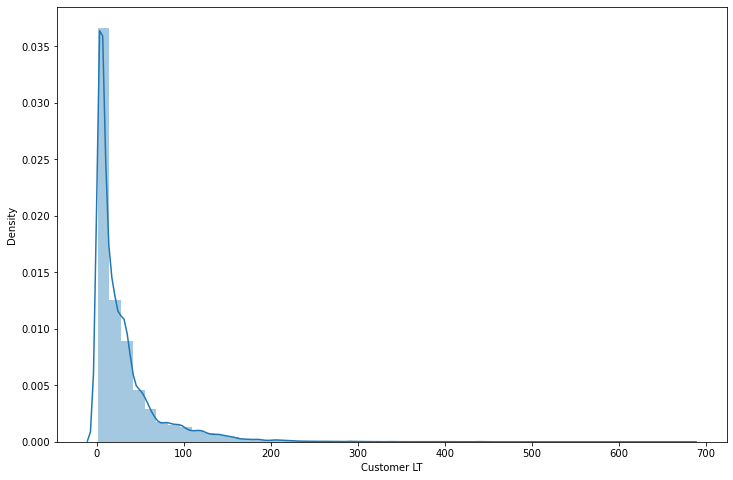

In [104]:
plt.figure(figsize=(12,8))
sns.distplot(df2['Customer LT'])

C:\Users\te521690\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Shipping LT', ylabel='Density'>

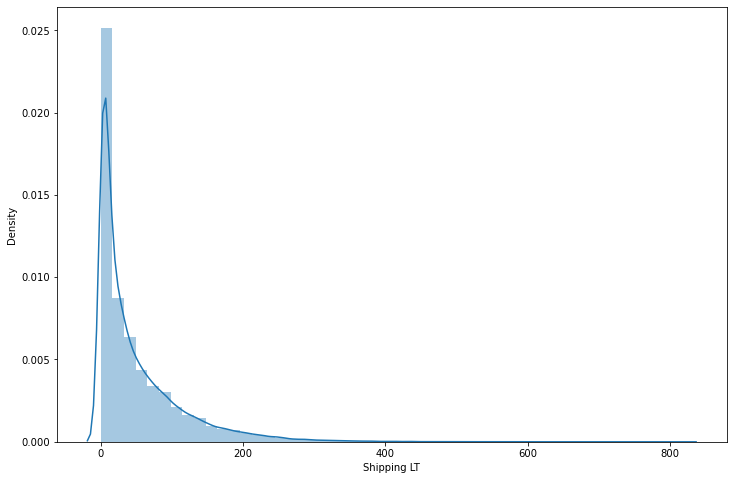

In [105]:
plt.figure(figsize=(12,8))
sns.distplot(df2['Shipping LT'])

<AxesSubplot:xlabel='Customer LT', ylabel='Shipping LT'>

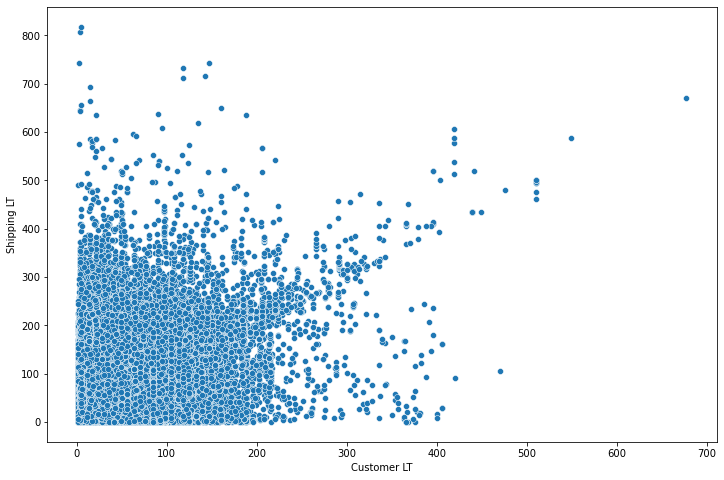

In [106]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Customer LT',y='Shipping LT',data=df2)

In [107]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106357 entries, 0 to 112257
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   OTTO-GPL     106357 non-null  object        
 1   Part         106357 non-null  object        
 2   Part Type    106357 non-null  object        
 3   QtyInvoiced  106357 non-null  float64       
 4   Ord-Dt       106357 non-null  datetime64[ns]
 5   ReqDt        106357 non-null  datetime64[ns]
 6   DueDt        106357 non-null  datetime64[ns]
 7   InvoiceDt    106357 non-null  datetime64[ns]
 8   Customer LT  106357 non-null  int64         
 9   Shipping LT  106357 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(2), object(3)
memory usage: 8.9+ MB


In [108]:
# Identify the columns containing string variables
string_columns = ['Part', 'OTTO-GPL', 'Part Type']

# Convert columns to string data type. added on June 27, 2023
#df1[string_columns] = df1[string_columns].astype(str)

# Perform one-hot encoding
dummy_variables = pd.get_dummies(df2[string_columns])

# Concatenate the dummy variables with the original dataset
df_encoded = pd.concat([df2, dummy_variables], axis=1)

# Drop the original string columns if needed
df3 = df_encoded.drop(string_columns, axis=1)


In [109]:
from datetime import datetime

# Convert 'Ord-Dt' column to datetime
df3['Ord-Dt'] = pd.to_datetime(df3['Ord-Dt'])
# Convert datetime to Unix timestamp
df3['Ord-Dt_Euc'] = df3['Ord-Dt'].apply(lambda x: x.to_pydatetime().timestamp())

# Convert 'Ord-Dt' column to datetime
df3['ReqDt'] = pd.to_datetime(df3['ReqDt'])
# Convert datetime to Unix timestamp
df3['ReqDt_Euc'] = df3['ReqDt'].apply(lambda x: x.to_pydatetime().timestamp())

# Convert 'Ord-Dt' column to datetime
df3['DueDt'] = pd.to_datetime(df3['DueDt'])
# Convert datetime to Unix timestamp
df3['DueDt_Euc'] = df3['DueDt'].apply(lambda x: x.to_pydatetime().timestamp())

# # Convert 'Ord-Dt' column to datetime
# df3['InvoiceDt'] = pd.to_datetime(df3['InvoiceDt'])
# # Convert datetime to Unix timestamp
# df3['InvoiceDt_Euc'] = df3['InvoiceDt'].apply(lambda x: x.to_pydatetime().timestamp())



In [110]:
df3 = df3.drop(['Ord-Dt','ReqDt','DueDt','InvoiceDt'], axis=1)

In [111]:
df2['Part'].value_counts()

871788-000    1598
360954-000    1354
197886-000     944
268120-000     885
244890-000     795
              ... 
CR3708-000       1
CA4829-000       1
D39778-000       1
EN8710-000       1
926093-000       1
Name: Part, Length: 2157, dtype: int64

In [112]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106357 entries, 0 to 112257
Columns: 2219 entries, QtyInvoiced to DueDt_Euc
dtypes: float64(4), int64(2), uint8(2213)
memory usage: 230.1 MB


In [113]:
df3.columns

Index(['QtyInvoiced', 'Customer LT', 'Shipping LT', 'Part_000144-000',
       'Part_004049-000', 'Part_004354-000', 'Part_007356-000',
       'Part_008440-000', 'Part_011589-000', 'Part_014670-000',
       ...
       'OTTO-GPL_Z63', 'OTTO-GPL_Z72', 'Part Type_ATO', 'Part Type_COMP',
       'Part Type_MTO', 'Part Type_MTS', 'Part Type_MTSQS', 'Ord-Dt_Euc',
       'ReqDt_Euc', 'DueDt_Euc'],
      dtype='object', length=2219)

In [114]:
X = df3.drop('Shipping LT',axis=1)
y = df3['Shipping LT']

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train_0, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [117]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
scaler = MinMaxScaler()

In [119]:
print(X_train_0.dtypes)

QtyInvoiced        float64
Customer LT          int64
Part_000144-000      uint8
Part_004049-000      uint8
Part_004354-000      uint8
                    ...   
Part Type_MTS        uint8
Part Type_MTSQS      uint8
Ord-Dt_Euc         float64
ReqDt_Euc          float64
DueDt_Euc          float64
Length: 2218, dtype: object


In [120]:
X_train= scaler.fit_transform(X_train_0)

In [121]:
X_test = scaler.transform(X_test)

In [122]:
X_train.shape

(74449, 2218)

In [123]:
X_test.shape

(31908, 2218)

### Creating a model

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [125]:
model = Sequential()

model.add(Dense(100,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mse')

### Training the model

In [126]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model with early stopping
model.fit(x=X_train, y=y_train.values,
          validation_data=(X_test, y_test.values),
          batch_size=128, epochs=400, callbacks=[early_stopping])


Epoch 1/400
582/582 [==============================] - 4s 6ms/step - loss: 2989.8079 - val_loss: 2251.9075
Epoch 2/400
582/582 [==============================] - 3s 5ms/step - loss: 2199.1248 - val_loss: 2162.3596
Epoch 3/400
582/582 [==============================] - 3s 5ms/step - loss: 2079.6956 - val_loss: 2135.9646
Epoch 4/400
582/582 [==============================] - 4s 7ms/step - loss: 1979.9335 - val_loss: 2016.8396
Epoch 5/400
582/582 [==============================] - 4s 6ms/step - loss: 1744.5797 - val_loss: 1785.9116
Epoch 6/400
582/582 [==============================] - 4s 6ms/step - loss: 1518.2394 - val_loss: 1649.9536
Epoch 7/400
582/582 [==============================] - 4s 7ms/step - loss: 1396.5048 - val_loss: 1582.7368
Epoch 8/400
582/582 [==============================] - 3s 6ms/step - loss: 1306.1505 - val_loss: 1562.2555
Epoch 9/400
582/582 [==============================] - 3s 6ms/step - loss: 1248.8634 - val_loss: 1505.2986
Epoch 10/400
582/582 [===============

In [47]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Train on 104179 samples, validate on 44649 samples
Epoch 1/400
104179/104179 [==============================] - 16s 155us/sample - loss: 3799.3488 - val_loss: 1360.9240
Epoch 2/400
104179/104179 [==============================] - 10s 99us/sample - loss: 511.8905 - val_loss: 133.5825
Epoch 3/400
104179/104179 [==============================] - 11s 108us/sample - loss: 66.9861 - val_loss: 70.4991
Epoch 4/400
104179/104179 [==============================] - 10s 100us/sample - loss: 36.4038 - val_loss: 67.4166
Epoch 5/400
104179/104179 [==============================] - 9s 89us/sample - loss: 36.5008 - val_loss: 69.5106
Epoch 6/400
104179/104179 [==============================] - 9s 88us/sample - loss: 37.7434 - val_loss: 79.9948
Epoch 7/400
104179/104179 [==============================] - 9s 88us/sample - loss: 36.8089 - val_loss: 69.6018
Epoch 8/400
104179/104179 [==============================] - 11s 106us/sample - loss: 35.6235 - val_loss: 68.4739
Epoch 9/400
104179/104179 [===========

Epoch 73/400
104179/104179 [==============================] - 10s 91us/sample - loss: 7.5052 - val_loss: 41.6478
Epoch 74/400
104179/104179 [==============================] - 9s 88us/sample - loss: 7.9051 - val_loss: 42.8773
Epoch 75/400
104179/104179 [==============================] - 9s 89us/sample - loss: 7.4629 - val_loss: 41.1441
Epoch 76/400
104179/104179 [==============================] - 9s 85us/sample - loss: 7.2885 - val_loss: 41.8485
Epoch 77/400
104179/104179 [==============================] - 9s 88us/sample - loss: 7.5120 - val_loss: 40.4715
Epoch 78/400
104179/104179 [==============================] - 10s 94us/sample - loss: 7.4583 - val_loss: 41.7609
Epoch 79/400
104179/104179 [==============================] - 11s 107us/sample - loss: 7.0733 - val_loss: 40.2185
Epoch 80/400
104179/104179 [==============================] - 10s 98us/sample - loss: 7.3409 - val_loss: 41.3495
Epoch 81/400
104179/104179 [==============================] - 10s 93us/sample - loss: 7.4177 - val_

104179/104179 [==============================] - 10s 93us/sample - loss: 4.5048 - val_loss: 35.1748
Epoch 146/400
104179/104179 [==============================] - 10s 97us/sample - loss: 4.3998 - val_loss: 35.8677
Epoch 147/400
104179/104179 [==============================] - 10s 95us/sample - loss: 4.3116 - val_loss: 35.3116
Epoch 148/400
104179/104179 [==============================] - 10s 95us/sample - loss: 4.4369 - val_loss: 36.0205
Epoch 149/400
104179/104179 [==============================] - 10s 94us/sample - loss: 4.2973 - val_loss: 35.7842
Epoch 150/400
104179/104179 [==============================] - 10s 98us/sample - loss: 4.2499 - val_loss: 35.9293
Epoch 151/400
104179/104179 [==============================] - 10s 97us/sample - loss: 4.3068 - val_loss: 36.1284
Epoch 152/400
104179/104179 [==============================] - 10s 95us/sample - loss: 4.3412 - val_loss: 37.1295
Epoch 153/400
104179/104179 [==============================] - 10s 95us/sample - loss: 4.2171 - val_lo

Epoch 217/400
104179/104179 [==============================] - 9s 87us/sample - loss: 3.1015 - val_loss: 34.8523
Epoch 218/400
104179/104179 [==============================] - 9s 89us/sample - loss: 3.0943 - val_loss: 35.3566
Epoch 219/400
104179/104179 [==============================] - 9s 89us/sample - loss: 3.1972 - val_loss: 34.8867
Epoch 220/400
104179/104179 [==============================] - 10s 93us/sample - loss: 3.1281 - val_loss: 34.3048
Epoch 221/400
104179/104179 [==============================] - 9s 88us/sample - loss: 3.0456 - val_loss: 34.3787
Epoch 222/400
104179/104179 [==============================] - 10s 98us/sample - loss: 3.1609 - val_loss: 35.1376
Epoch 223/400
104179/104179 [==============================] - 10s 95us/sample - loss: 3.0602 - val_loss: 34.9588
Epoch 224/400
104179/104179 [==============================] - 10s 92us/sample - loss: 3.1828 - val_loss: 35.7853
Epoch 225/400
104179/104179 [==============================] - 9s 90us/sample - loss: 2.9798

104179/104179 [==============================] - 10s 92us/sample - loss: 2.0711 - val_loss: 32.4676
Epoch 362/400
104179/104179 [==============================] - 9s 90us/sample - loss: 2.0863 - val_loss: 32.6556
Epoch 363/400
104179/104179 [==============================] - 9s 90us/sample - loss: 1.9868 - val_loss: 32.5245
Epoch 364/400
104179/104179 [==============================] - 9s 90us/sample - loss: 2.0430 - val_loss: 32.7168
Epoch 365/400
104179/104179 [==============================] - 9s 91us/sample - loss: 2.0418 - val_loss: 32.8328
Epoch 366/400
104179/104179 [==============================] - 10s 96us/sample - loss: 2.0661 - val_loss: 32.7701
Epoch 367/400
104179/104179 [==============================] - 9s 89us/sample - loss: 2.0649 - val_loss: 31.9975
Epoch 368/400
104179/104179 [==============================] - 9s 91us/sample - loss: 1.9215 - val_loss: 32.5425
Epoch 369/400
104179/104179 [==============================] - 9s 89us/sample - loss: 2.1149 - val_loss: 32.

In [127]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

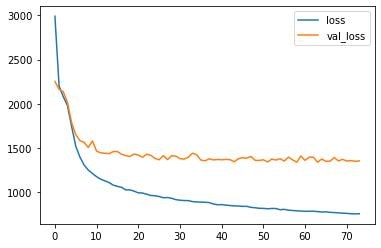

In [128]:
losses.plot()

### Evaluation of the model

In [129]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [130]:
X_test

array([[0.01488643, 0.01459854, 0.        , ..., 0.56707254, 0.41566644,
        0.41566644],
       [0.01474831, 0.00912409, 0.        , ..., 0.91559449, 0.70236054,
        0.70236054],
       [0.01491713, 0.10036496, 0.        , ..., 0.87171881, 0.70030293,
        0.70030293],
       ...,
       [0.01493247, 0.00547445, 0.        , ..., 0.51571177, 0.36971308,
        0.36971308],
       [0.01474678, 0.01094891, 0.        , ..., 0.73591804, 0.55418381,
        0.55418381],
       [0.01519337, 0.02372263, 0.        , ..., 0.5662447 , 0.41840992,
        0.41840992]])

In [131]:
predictions = model.predict(X_test)

998/998 [==============================] - 1s 1ms/step


In [132]:
mean_absolute_error(y_test,predictions)

20.638851828946944

In [133]:
np.sqrt(mean_squared_error(y_test,predictions))

36.778551320872154

In [134]:
explained_variance_score(y_test,predictions)

0.671765621443486

In [135]:
df3['Shipping LT'].mean()

50.154075425218835

In [136]:
df3['Shipping LT'].median()

26.0

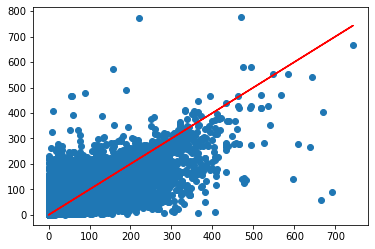

In [137]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [138]:
errors = y_test.values.reshape(31908, 1) - predictions

C:\Users\te521690\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

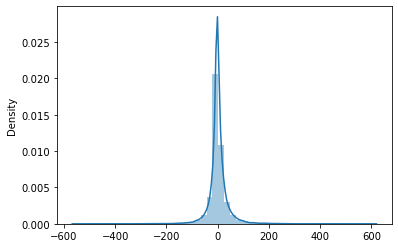

In [139]:
sns.distplot(errors)

### Predicting on a brand new house

In [140]:
log4 = log3.drop(['SO_Ord_date','Req_Date','Due_Date'], axis=1)

In [141]:
X1 = log4.drop('Shipping LT',axis=1)
y1 = log4['Shipping LT']

In [142]:
# X1= scaler.fit_transform(X1)

In [143]:
X1=pd.DataFrame(X1)

In [144]:
X1.head()

,QtyInvoiced,Customer LT,Ord_dt_Euc,Part_000144-000,Part_004049-000,Part_004354-000,Part_007356-000,Part_008440-000,Part_011589-000,Part_014670-000,...,OTTO-GPL_JA2,OTTO-GPL_K93,OTTO-GPL_KB1,OTTO-GPL_Z63,OTTO-GPL_Z72,Part Type_ATO,Part Type_COMP,Part Type_MTO,Part Type_MTS,Part Type_MTSQS
0,2725.0,14,1.685938e+09,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,250.0,3,1.685419e+09,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,70000.0,17,1.684469e+09,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,138000.0,17,1.684469e+09,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,25.0,49,1.683605e+09,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [145]:
X1.shape

(8092, 2226)

In [146]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               221900    
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 50)                3800      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 19)                494       
                                                                 
 dense_6 (Dense)             (None, 1)                 2

In [147]:
predictions_X1=model.predict(X1)

ValueError: in user code:

    File "C:\Users\te521690\Anaconda3\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\te521690\Anaconda3\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\te521690\Anaconda3\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\te521690\Anaconda3\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\te521690\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\te521690\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 249, in assert_input_compatibility
        f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 2218, but received input with shape (None, 2226)
    
    Call arguments received by layer "sequential" (type Sequential):
      • inputs=tf.Tensor(shape=(None, 2226), dtype=float64)
      • training=False
      • mask=None


In [148]:
# X.to_excel(directory +  '/train_predict_data.xlsx', sheet_name = 'Train_Data')

In [149]:
X2 = X1.transpose()

In [150]:
X3 = X2.iloc[:,0]

In [151]:
X3.head()

QtyInvoiced        2.725000e+03
Customer LT        1.400000e+01
Ord_dt_Euc         1.685938e+09
Part_000144-000    0.000000e+00
Part_004049-000    0.000000e+00
Name: 0, dtype: float64

In [153]:
X3.to_excel(directory +  '/train_predict_data.xlsx', sheet_name = 'Predict_data')

In [154]:
df4 = X.transpose().iloc[:,0]

In [155]:
with pd.ExcelWriter (directory + '/train_predict_data.xlsx', engine ='openpyxl',
                    mode='a') as writer:
                        df4.to_excel(writer, sheet_name = 'Test_Data')